In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import os

In [60]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\인공지능모델_데이터셋구축')
df = pd.read_excel('상인점_이상치_제거완료_VAR전처리_210430_정민재.xlsx')
df.index = df['날짜']
del df['날짜']
df.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),매출액
날짜,,,,,
2017-11-27 00:00:00,2.6,0.0,1.2,88,0
2017-11-27 01:00:00,1.8,0.0,0.4,92,0
2017-11-27 02:00:00,1.2,0.0,0.4,93,0
2017-11-27 03:00:00,0.9,0.0,1.3,95,0
2017-11-27 04:00:00,0.7,0.0,0.3,95,0


In [61]:
temper = [temp + 14 for temp in df['기온(°C)']]
df['기온(°C)'] = temper
df

,기온(°C),강수량(mm),풍속(m/s),습도(%),매출액
날짜,,,,,
2017-11-27 00:00:00,16.6,0.0,1.2,88,0
2017-11-27 01:00:00,15.8,0.0,0.4,92,0
2017-11-27 02:00:00,15.2,0.0,0.4,93,0
2017-11-27 03:00:00,14.9,0.0,1.3,95,0
2017-11-27 04:00:00,14.7,0.0,0.3,95,0
...,...,...,...,...,...
2020-08-18 20:00:00,44.5,0.0,1.0,63,209000
2020-08-18 21:00:00,44.4,0.0,1.4,60,86000
2020-08-18 22:00:00,43.0,0.0,0.6,68,40500


In [74]:
df.columns = ['temp', 'rainfall', 'wind', 'humid', 'sales']
df

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,16.6,0.01,1.2,88,0.01
2017-11-27 01:00:00,15.8,0.01,0.4,92,0.01
2017-11-27 02:00:00,15.2,0.01,0.4,93,0.01
2017-11-27 03:00:00,14.9,0.01,1.3,95,0.01
2017-11-27 04:00:00,14.7,0.01,0.3,95,0.01
...,...,...,...,...,...
2020-08-18 20:00:00,44.5,0.01,1.0,63,209000.00
2020-08-18 21:00:00,44.4,0.01,1.4,60,86000.00
2020-08-18 22:00:00,43.0,0.01,0.6,68,40500.00


In [75]:
df = df.replace(0, 0.01)
df

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,16.6,0.01,1.2,88,0.01
2017-11-27 01:00:00,15.8,0.01,0.4,92,0.01
2017-11-27 02:00:00,15.2,0.01,0.4,93,0.01
2017-11-27 03:00:00,14.9,0.01,1.3,95,0.01
2017-11-27 04:00:00,14.7,0.01,0.3,95,0.01
...,...,...,...,...,...
2020-08-18 20:00:00,44.5,0.01,1.0,63,209000.00
2020-08-18 21:00:00,44.4,0.01,1.4,60,86000.00
2020-08-18 22:00:00,43.0,0.01,0.6,68,40500.00


In [76]:
df_log = np.log(df)
df_logdiff = np.log(df).diff()

In [153]:
df_log

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,2.809403,-4.60517,0.182322,4.477337,-4.605170
2017-11-27 01:00:00,2.760010,-4.60517,-0.916291,4.521789,-4.605170
2017-11-27 02:00:00,2.721295,-4.60517,-0.916291,4.532599,-4.605170
2017-11-27 03:00:00,2.701361,-4.60517,0.262364,4.553877,-4.605170
2017-11-27 04:00:00,2.687847,-4.60517,-1.203973,4.553877,-4.605170
...,...,...,...,...,...
2020-08-18 20:00:00,3.795489,-4.60517,0.000000,4.143135,12.250090
2020-08-18 21:00:00,3.793239,-4.60517,0.336472,4.094345,11.362103
2020-08-18 22:00:00,3.761200,-4.60517,-0.510826,4.219508,10.609057


In [77]:
df_logdiff = df_logdiff.replace(np.nan, 0)
df_logdiff

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000
2017-11-27 01:00:00,-0.049393,0.0,-1.098612,0.044452,0.000000
2017-11-27 02:00:00,-0.038715,0.0,0.000000,0.010811,0.000000
2017-11-27 03:00:00,-0.019934,0.0,1.178655,0.021277,0.000000
2017-11-27 04:00:00,-0.013514,0.0,-1.466337,0.000000,0.000000
...,...,...,...,...,...
2020-08-18 20:00:00,-0.043963,0.0,-0.916291,0.211309,0.411464
2020-08-18 21:00:00,-0.002250,0.0,0.336472,-0.048790,-0.887987
2020-08-18 22:00:00,-0.032039,0.0,-0.847298,0.125163,-0.753045


In [57]:
df_logdiff.to_csv('test2.csv', encoding = 'cp949')

In [78]:
model = VAR(df_logdiff)
results = model.fit(maxlags = 100, ic = 'aic')
results.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 22, May, 2021
Time:                     17:33:50
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -9.36974
Nobs:                     23809.0    HQIC:                  -9.92098
Log likelihood:          -45256.9    FPE:                3.77067e-05
AIC:                     -10.1857    Det(Omega_mle):     3.41183e-05
--------------------------------------------------------------------
Results for equation temp
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000034         0.000199            0.170           0.865
L1.temp              0.314449         0.007430           42.320           0.000
L1.rainfall          0.000028         0.000264            0.104  

In [79]:
df_forc_120 = results.forecast(df_logdiff.values[-results.k_ar : ], 120)

In [80]:
df_forc_120

array([[-1.01467780e-02, -9.84190186e-02, -3.60409017e-01,
         4.17760759e-02, -1.28433412e+00],
       [-1.57889632e-02,  1.96700763e-01, -6.71667828e-02,
         2.31789453e-02,  4.97451268e-01],
       [-1.21440973e-02,  5.00324949e-03, -8.09758538e-02,
         9.99133551e-03, -3.27883476e-01],
       [-8.33632834e-03, -3.22190319e-02, -4.41864709e-02,
         2.02390720e-03, -1.71553037e-01],
       [-8.12590839e-03,  1.38566101e-01, -4.84551607e-02,
        -1.79497953e-03,  4.96257885e-01],
       [ 8.51120324e-03,  3.83663605e-03, -6.23206283e-02,
        -1.52798078e-02, -8.17352908e-01],
       [ 2.36991833e-02, -1.15603550e-01,  1.27370982e-01,
        -5.64568589e-02, -8.94044649e-01],
       [ 3.47246611e-02, -1.25330195e-01,  3.35235670e-01,
        -8.28870943e-02, -4.61247615e-01],
       [ 3.63526619e-02, -4.52238838e-03,  1.13662997e-01,
        -9.94888582e-02,  6.85542685e-01],
       [ 2.94265236e-02,  5.65272863e-02,  4.29496146e-01,
        -9.61185690e-02

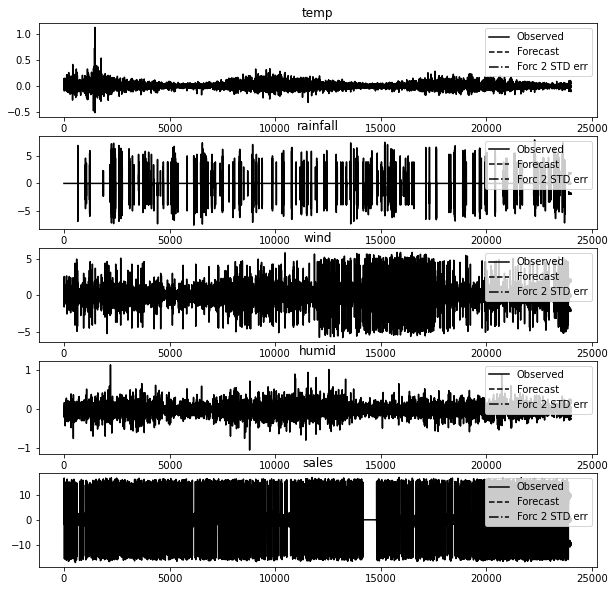

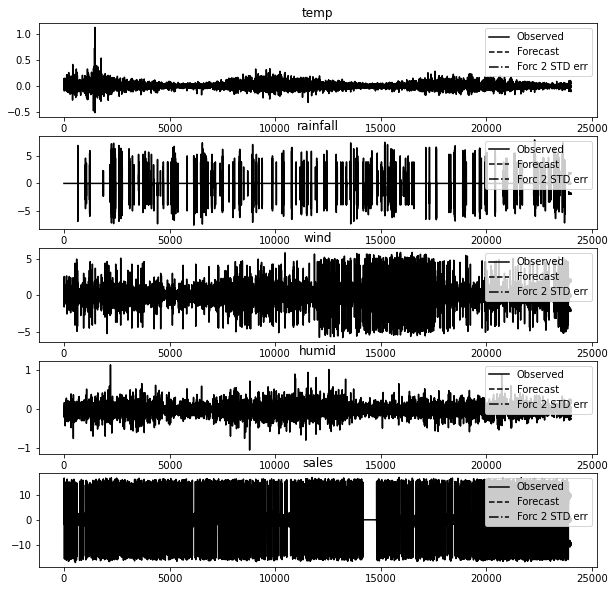

In [81]:
results.plot_forecast(120)

In [115]:
df_forc_120_pd = pd.DataFrame(df_forc_120)
df_forc_120_pd.columns = ['temp', 'rainfall', 'wind', 'humid', 'sales']
df_forc_120_pd

,temp,rainfall,wind,humid,sales
0,-0.010147,-0.098419,-0.360409,0.041776,-1.284334
1,-0.015789,0.196701,-0.067167,0.023179,0.497451
2,-0.012144,0.005003,-0.080976,0.009991,-0.327883
3,-0.008336,-0.032219,-0.044186,0.002024,-0.171553
4,-0.008126,0.138566,-0.048455,-0.001795,0.496258
...,...,...,...,...,...
115,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
116,-0.023786,0.013563,-0.152146,0.057739,-0.018601
117,-0.024842,0.012228,-0.120831,0.055430,-0.080870
118,-0.023160,-0.002375,-0.108641,0.049944,-0.057669


In [148]:
df_forc_120_pd.to_csv('fore.csv', encoding = 'cp949')

In [149]:
df_logdiff.to_csv('logdiff.csv', encoding = 'cp949')

In [118]:
df_forc_120_pd['temp']

0     -0.010147
1     -0.015789
2     -0.012144
3     -0.008336
4     -0.008126
         ...   
115   -0.022257
116   -0.023786
117   -0.024842
118   -0.023160
119   -0.018603
Name: temp, Length: 120, dtype: float64

In [123]:
df_forecast = pd.concat([df_logdiff, df_forc_120_pd])
df_forecast

,temp,rainfall,wind,humid,sales
2017-11-27 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-27 01:00:00,-0.049393,0.000000,-1.098612,0.044452,0.000000
2017-11-27 02:00:00,-0.038715,0.000000,0.000000,0.010811,0.000000
2017-11-27 03:00:00,-0.019934,0.000000,1.178655,0.021277,0.000000
2017-11-27 04:00:00,-0.013514,0.000000,-1.466337,0.000000,0.000000
...,...,...,...,...,...
115,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
116,-0.023786,0.013563,-0.152146,0.057739,-0.018601
117,-0.024842,0.012228,-0.120831,0.055430,-0.080870
118,-0.023160,-0.002375,-0.108641,0.049944,-0.057669


In [146]:
df_log.to_csv('df_log.csv', encoding = 'cp949')

In [130]:
temp_list = df_forecast['temp'][1:]
rainfall_list = df_forecast['rainfall'][1:]
wind_list = df_forecast['wind'][1:]
humid_list = df_forecast['humid'][1:]
sales_list = df_forecast['sales'][1:]

t_list = [a + b for a, b in zip(df_forecast['temp'], df_log['temp'])]
r_list = [a + b for a, b in zip(df_forecast['rainfall'], df_log['rainfall'])]
w_list = [a + b for a, b in zip(df_forecast['wind'], df_log['wind'])]
h_list = [a + b for a, b in zip(df_forecast['humid'], df_log['humid'])]
s_list = [a + b for a, b in zip(df_forecast['sales'], df_log['sales'])]

df_forecast_2 = pd.DataFrame()
df_forecast_2['temp'] = t_list
df_forecast_2['rainfall'] = r_list
df_forecast_2['wind'] = w_list
df_forecast_2['humid'] = h_list
df_forecast_2['sales'] = s_list
df_forecast_2

,temp,rainfall,wind,humid,sales
0,2.809403,-4.60517,0.182322,4.477337,-4.605170
1,2.710617,-4.60517,-2.014903,4.566240,-4.605170
2,2.682581,-4.60517,-0.916291,4.543410,-4.605170
3,2.681427,-4.60517,1.441019,4.575154,-4.605170
4,2.674334,-4.60517,-2.670310,4.553877,-4.605170
...,...,...,...,...,...
23900,3.751526,-4.60517,-0.916291,4.354444,12.661553
23901,3.790990,-4.60517,0.672944,4.045554,10.474116
23902,3.729161,-4.60517,-1.358123,4.344671,9.856012
23903,3.699802,-4.60517,0.300105,4.388622,12.217153


In [137]:
df_forecast_3 = np.exp(df_forecast_2)
df_forecast_3

,temp,rainfall,wind,humid,sales
0,16.600000,0.01,1.200000,88.000000,0.010000
1,15.038554,0.01,0.133333,96.181818,0.010000
2,14.622785,0.01,0.400000,94.010870,0.010000
3,14.605921,0.01,4.225000,97.043011,0.010000
4,14.502685,0.01,0.069231,95.000000,0.010000
...,...,...,...,...,...
23900,42.586022,0.01,0.400000,77.823529,315386.281588
23901,44.300225,0.01,1.960000,57.142857,35387.559809
23902,41.644144,0.01,0.257143,77.066667,19072.674419
23903,40.439302,0.01,1.350000,80.529412,202228.395062


In [139]:
df_forecast_3.to_csv('상인점_VAR_예측.csv', encoding = 'cp949')

In [150]:
df_logdiff_fore = pd.read_csv('logdiff_fore.csv', encoding = 'cp949')
df_logdiff_fore

,날짜,temp,rainfall,wind,humid,sales
0,2017-11-27 0:00,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-27 1:00,-0.049393,0.000000,-1.098612,0.044452,0.000000
2,2017-11-27 2:00,-0.038715,0.000000,0.000000,0.010811,0.000000
3,2017-11-27 3:00,-0.019934,0.000000,1.178655,0.021277,0.000000
4,2017-11-27 4:00,-0.013514,0.000000,-1.466337,0.000000,0.000000
...,...,...,...,...,...,...
24020,2020-08-21 20:00,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
24021,2020-08-21 21:00,-0.023786,0.013563,-0.152146,0.057739,-0.018601
24022,2020-08-21 22:00,-0.024842,0.012228,-0.120831,0.055430,-0.080870
24023,2020-08-21 23:00,-0.023160,-0.002375,-0.108641,0.049944,-0.057669


In [173]:
df_logdiff

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000
2017-11-27 01:00:00,-0.049393,0.0,-1.098612,0.044452,0.000000
2017-11-27 02:00:00,-0.038715,0.0,0.000000,0.010811,0.000000
2017-11-27 03:00:00,-0.019934,0.0,1.178655,0.021277,0.000000
2017-11-27 04:00:00,-0.013514,0.0,-1.466337,0.000000,0.000000
...,...,...,...,...,...
2020-08-18 20:00:00,-0.043963,0.0,-0.916291,0.211309,0.411464
2020-08-18 21:00:00,-0.002250,0.0,0.336472,-0.048790,-0.887987
2020-08-18 22:00:00,-0.032039,0.0,-0.847298,0.125163,-0.753045


In [176]:
df_logdiff_fore_1 = df_logdiff_fore[1:]
df_logdiff_fore_1 = df_logdiff_fore_1.reset_index(drop = True)
df_logdiff_fore_1.index = df_logdiff_fore_1['날짜']
del df_logdiff_fore_1['날짜']
df_logdiff_fore_1

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 1:00,-0.049393,0.000000,-1.098612,0.044452,0.000000
2017-11-27 2:00,-0.038715,0.000000,0.000000,0.010811,0.000000
2017-11-27 3:00,-0.019934,0.000000,1.178655,0.021277,0.000000
2017-11-27 4:00,-0.013514,0.000000,-1.466337,0.000000,0.000000
2017-11-27 5:00,0.006780,0.000000,-0.405465,-0.054067,0.000000
...,...,...,...,...,...
2020-08-21 20:00,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
2020-08-21 21:00,-0.023786,0.013563,-0.152146,0.057739,-0.018601
2020-08-21 22:00,-0.024842,0.012228,-0.120831,0.055430,-0.080870


In [181]:
df_logdiff_fore

,날짜,temp,rainfall,wind,humid,sales
0,2017-11-27 0:00,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-27 1:00,-0.049393,0.000000,-1.098612,0.044452,0.000000
2,2017-11-27 2:00,-0.038715,0.000000,0.000000,0.010811,0.000000
3,2017-11-27 3:00,-0.019934,0.000000,1.178655,0.021277,0.000000
4,2017-11-27 4:00,-0.013514,0.000000,-1.466337,0.000000,0.000000
...,...,...,...,...,...,...
24020,2020-08-21 20:00,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
24021,2020-08-21 21:00,-0.023786,0.013563,-0.152146,0.057739,-0.018601
24022,2020-08-21 22:00,-0.024842,0.012228,-0.120831,0.055430,-0.080870
24023,2020-08-21 23:00,-0.023160,-0.002375,-0.108641,0.049944,-0.057669


In [223]:
df_log

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,2.809403,-4.60517,0.182322,4.477337,-4.605170
2017-11-27 01:00:00,2.760010,-4.60517,-0.916291,4.521789,-4.605170
2017-11-27 02:00:00,2.721295,-4.60517,-0.916291,4.532599,-4.605170
2017-11-27 03:00:00,2.701361,-4.60517,0.262364,4.553877,-4.605170
2017-11-27 04:00:00,2.687847,-4.60517,-1.203973,4.553877,-4.605170
...,...,...,...,...,...
2020-08-18 20:00:00,3.795489,-4.60517,0.000000,4.143135,12.250090
2020-08-18 21:00:00,3.793239,-4.60517,0.336472,4.094345,11.362103
2020-08-18 22:00:00,3.761200,-4.60517,-0.510826,4.219508,10.609057


In [192]:
df_logdiff_fore['temp'][0] = df_log['temp'][0]
df_logdiff_fore['rainfall'][0] = df_log['rainfall'][0]
df_logdiff_fore['wind'][0] = df_log['wind'][0]
df_logdiff_fore['humid'][0] = df_log['humid'][0]
df_logdiff_fore['sales'][0] = df_log['sales'][0]

df_logdiff_fore

C:\Users\alswo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alswo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alswo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

,날짜,temp,rainfall,wind,humid,sales
0,2017-11-27 0:00,2.809403,-4.605170,0.182322,4.477337,-4.605170
1,2017-11-27 1:00,-0.049393,0.000000,-1.098612,0.044452,0.000000
2,2017-11-27 2:00,-0.038715,0.000000,0.000000,0.010811,0.000000
3,2017-11-27 3:00,-0.019934,0.000000,1.178655,0.021277,0.000000
4,2017-11-27 4:00,-0.013514,0.000000,-1.466337,0.000000,0.000000
...,...,...,...,...,...,...
24020,2020-08-21 20:00,-0.022257,-0.010657,-0.125615,0.059627,-0.042801
24021,2020-08-21 21:00,-0.023786,0.013563,-0.152146,0.057739,-0.018601
24022,2020-08-21 22:00,-0.024842,0.012228,-0.120831,0.055430,-0.080870
24023,2020-08-21 23:00,-0.023160,-0.002375,-0.108641,0.049944,-0.057669


In [222]:
df_logdiff_fore['sales']

0       -4.605170
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
24020   -0.042801
24021   -0.018601
24022   -0.080870
24023   -0.057669
24024   -0.217596
Name: sales, Length: 24025, dtype: float64

In [206]:
temperature = []
b = 0
for a in df_logdiff_fore['temp'] :
    b += a
    temperature.append(b)
   
# temperature
rainfall = []
b = 0
for a in df_logdiff_fore['rainfall'] :
    b += a
    rainfall.append(b)
    
wind = []
b = 0
for a in df_logdiff_fore['wind'] :
    b += a
    wind.append(b)
    
humid = []
b = 0
for a in df_logdiff_fore['humid'] :
    b += a
    humid.append(b)
    
sales = []
b = 0
for a in df_logdiff_fore['sales'] :
    b += a
    sales.append(b)
    
df_log_fore = pd.DataFrame()
df_log_fore['날짜'] = df_logdiff_fore['날짜']
df_log_fore['temp'] = temperature
df_log_fore['rainfall'] = rainfall
df_log_fore['wind'] = wind
df_log_fore['humid'] = humid
df_log_fore['sales'] = sales
df_log_fore

,날짜,temp,rainfall,wind,humid,sales
0,2017-11-27 0:00,2.809403,-4.605170,0.182322,4.477337,-4.605170
1,2017-11-27 1:00,2.760010,-4.605170,-0.916291,4.521789,-4.605170
2,2017-11-27 2:00,2.721295,-4.605170,-0.916291,4.532599,-4.605170
3,2017-11-27 3:00,2.701361,-4.605170,0.262364,4.553877,-4.605170
4,2017-11-27 4:00,2.687847,-4.605170,-1.203973,4.553877,-4.605170
...,...,...,...,...,...,...
24020,2020-08-21 20:00,3.815917,-4.649682,0.222975,4.083975,-20.974256
24021,2020-08-21 21:00,3.792131,-4.636119,0.070828,4.141714,-20.992857
24022,2020-08-21 22:00,3.767289,-4.623892,-0.050002,4.197145,-21.073727
24023,2020-08-21 23:00,3.744129,-4.626267,-0.158644,4.247088,-21.131396


In [207]:
df_log_fore.index = df_log_fore['날짜']
del df_log_fore['날짜']
df_log_fore

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 0:00,2.809403,-4.605170,0.182322,4.477337,-4.605170
2017-11-27 1:00,2.760010,-4.605170,-0.916291,4.521789,-4.605170
2017-11-27 2:00,2.721295,-4.605170,-0.916291,4.532599,-4.605170
2017-11-27 3:00,2.701361,-4.605170,0.262364,4.553877,-4.605170
2017-11-27 4:00,2.687847,-4.605170,-1.203973,4.553877,-4.605170
...,...,...,...,...,...
2020-08-21 20:00,3.815917,-4.649682,0.222975,4.083975,-20.974256
2020-08-21 21:00,3.792131,-4.636119,0.070828,4.141714,-20.992857
2020-08-21 22:00,3.767289,-4.623892,-0.050002,4.197145,-21.073727


In [221]:
df_log_fore_exp = np.exp(df_log_fore)
df_log_fore_exp

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 0:00,16.600000,0.010000,1.200000,88.000000,1.000000e-02
2017-11-27 1:00,15.800000,0.010000,0.400000,92.000000,1.000000e-02
2017-11-27 2:00,15.200000,0.010000,0.400000,93.000000,1.000000e-02
2017-11-27 3:00,14.900000,0.010000,1.300000,95.000000,1.000000e-02
2017-11-27 4:00,14.700000,0.010000,0.300000,95.000000,1.000000e-02
...,...,...,...,...,...
2020-08-21 20:00,45.418371,0.009565,1.249789,59.381051,7.780298e-10
2020-08-21 21:00,44.350814,0.009695,1.073397,62.910572,7.636917e-10
2020-08-21 22:00,43.262606,0.009815,0.951227,66.496185,7.043635e-10


In [217]:
df_log_fore_exp.iloc[:-10]

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 0:00,16.600000,0.010000,1.200000,88.000000,1.000000e-02
2017-11-27 1:00,15.800000,0.010000,0.400000,92.000000,1.000000e-02
2017-11-27 2:00,15.200000,0.010000,0.400000,93.000000,1.000000e-02
2017-11-27 3:00,14.900000,0.010000,1.300000,95.000000,1.000000e-02
2017-11-27 4:00,14.700000,0.010000,0.300000,95.000000,1.000000e-02
...,...,...,...,...,...
2020-08-21 10:00,43.982423,0.010758,1.328538,61.109411,2.570541e-10
2020-08-21 11:00,45.221892,0.010357,1.477328,57.202361,3.298298e-10
2020-08-21 12:00,46.470025,0.010291,1.659842,53.799567,3.532467e-10


In [180]:
df_log

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,2.809403,-4.60517,0.182322,4.477337,-4.605170
2017-11-27 01:00:00,2.760010,-4.60517,-0.916291,4.521789,-4.605170
2017-11-27 02:00:00,2.721295,-4.60517,-0.916291,4.532599,-4.605170
2017-11-27 03:00:00,2.701361,-4.60517,0.262364,4.553877,-4.605170
2017-11-27 04:00:00,2.687847,-4.60517,-1.203973,4.553877,-4.605170
...,...,...,...,...,...
2020-08-18 20:00:00,3.795489,-4.60517,0.000000,4.143135,12.250090
2020-08-18 21:00:00,3.793239,-4.60517,0.336472,4.094345,11.362103
2020-08-18 22:00:00,3.761200,-4.60517,-0.510826,4.219508,10.609057


In [182]:
temperature = [a + b for a, b in zip(df_logdiff_fore_1['temp'], df_log['temp'])]
temperature

[2.760009940362498,
 2.721295428032921,
 2.7013612128522304,
 2.687847493951413,
 2.6946271807846904,
 2.653241964770069,
 2.610069792607215,
 2.6318888397420066,
 2.766319109136646,
 2.917770732226186,
 3.068052935084279,
 3.152736022133617,
 3.218875825363656,
 3.2695689388682005,
 3.277144733183719,
 3.2995337279921766,
 3.2580965378856552,
 3.165475048021482,
 3.1267605361410857,
 3.068052934960395,
 3.020424886133617,
 2.9755295661443624,
 2.9652730662364717,
 2.9285235240692824,
 2.884800712860541,
 2.850706501846709,
 2.8213788865037333,
 2.797281334409213,
 2.815408719830153,
 2.7972813344227094,
 2.734367509830153,
 2.8332133444195837,
 2.949688335056216,
 3.1000922890525846,
 3.173878458878234,
 3.261935313937465,
 3.2733640103286477,
 3.3141860051522705,
 3.346389144672526,
 3.38099467416716,
 3.328626688344636,
 3.29953372782732,
 3.2657594108856554,
 3.2188758247670513,
 3.1822118408682005,
 3.1612467124966095,
 3.1000922890315645,
 3.049273040878234,
 3.0155349004820207,


In [183]:
len(temperature)

23905

In [175]:
df_log_1 = df_log[1:]
df_log_1

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 01:00:00,2.760010,-4.60517,-0.916291,4.521789,-4.605170
2017-11-27 02:00:00,2.721295,-4.60517,-0.916291,4.532599,-4.605170
2017-11-27 03:00:00,2.701361,-4.60517,0.262364,4.553877,-4.605170
2017-11-27 04:00:00,2.687847,-4.60517,-1.203973,4.553877,-4.605170
2017-11-27 05:00:00,2.694627,-4.60517,-1.609438,4.499810,-4.605170
...,...,...,...,...,...
2020-08-18 20:00:00,3.795489,-4.60517,0.000000,4.143135,12.250090
2020-08-18 21:00:00,3.793239,-4.60517,0.336472,4.094345,11.362103
2020-08-18 22:00:00,3.761200,-4.60517,-0.510826,4.219508,10.609057


In [179]:
temperature = [a + b for a, b in zip(df_logdiff_fore_1['temp'], df_log_1['temp'])]
temperature

[2.710617185032921,
 2.6825809158522307,
 2.681426997951413,
 2.6743337747846905,
 2.701406867770069,
 2.611856748607215,
 2.5668976207420067,
 2.653707887136646,
 2.900749378226186,
 3.0692223550842788,
 3.218335138133617,
 3.237419109363656,
 3.2850156278682006,
 3.320262053183719,
 3.2847205269921766,
 3.321922722885655,
 3.2166593480214822,
 3.0728535581410856,
 3.0880460239603953,
 3.009345334133617,
 2.9727968371443625,
 2.9306342462364716,
 2.955016566069282,
 2.891773981860541,
 2.841077901846709,
 2.816612290503733,
 2.792051271409213,
 2.7731837828301527,
 2.8335361044227096,
 2.7791539498301527,
 2.6714536844195838,
 2.9320591790562163,
 3.0661633260525845,
 3.250496242878234,
 3.247664628937465,
 3.349992169328648,
 3.2847927061522704,
 3.3550079996725257,
 3.3785922851671604,
 3.4156002033446358,
 3.27625870282732,
 3.270440766885655,
 3.231985093767051,
 3.1719922388682007,
 3.1455478564966093,
 3.1402815840315648,
 3.038937865878234,
 2.998453792482021,
 2.98179676085017

In [144]:
df_si = pd.read_excel('상인점_시간대별매출_200819~20831.xls')
df_si = df_si.transpose()
df_si

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31
Unnamed: 1,43000,104000,143000,0,80000,78500,50500,15500,14000,33000,14000,67000,131000
Unnamed: 2,81000,0,37500,83000,84500,51000,39000,55000,10500,48000,171500,35500,158500
Unnamed: 3,164000,161500,15000,116000,96000,29000,26000,0,30000,125000,48000,109500,16500
Unnamed: 4,7000,9500,191500,166000,79500,101000,55000,120500,11500,101000,120500,53000,18000
Unnamed: 5,29500,61000,88500,132000,0,134000,0,50000,87000,82500,102000,117500,0
Unnamed: 6,104000,0,70500,166000,118500,40500,9000,0,50000,232500,33000,106000,0
Unnamed: 7,0,45500,45500,160000,0,0,14000,24500,129500,104500,70000,41000,96500
Unnamed: 8,76000,7000,74500,173000,14000,75000,72500,0,56500,50500,155500,12000,13500
Unnamed: 9,16000,31000,14000,56500,22000,0,6000,42000,39500,73000,0,0,94500


In [145]:
df_si.to_csv('상인점_시간대별매출_200819~20831.csv', encoding = 'cp949')

In [88]:
df_diff = df.diff()
df_diff

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN
2017-11-27 01:00:00,-0.8,0.0,-0.8,4.0,0.0
2017-11-27 02:00:00,-0.6,0.0,0.0,1.0,0.0
2017-11-27 03:00:00,-0.3,0.0,0.9,2.0,0.0
2017-11-27 04:00:00,-0.2,0.0,-1.0,0.0,0.0
...,...,...,...,...,...
2020-08-18 20:00:00,-2.0,0.0,-1.5,12.0,70500.0
2020-08-18 21:00:00,-0.1,0.0,0.4,-3.0,-123000.0
2020-08-18 22:00:00,-1.4,0.0,-0.8,8.0,-45500.0


In [84]:
df

,temp,rainfall,wind,humid,sales
날짜,,,,,
2017-11-27 00:00:00,16.6,0.01,1.2,88,0.01
2017-11-27 01:00:00,15.8,0.01,0.4,92,0.01
2017-11-27 02:00:00,15.2,0.01,0.4,93,0.01
2017-11-27 03:00:00,14.9,0.01,1.3,95,0.01
2017-11-27 04:00:00,14.7,0.01,0.3,95,0.01
...,...,...,...,...,...
2020-08-18 20:00:00,44.5,0.01,1.0,63,209000.00
2020-08-18 21:00:00,44.4,0.01,1.4,60,86000.00
2020-08-18 22:00:00,43.0,0.01,0.6,68,40500.00


In [105]:
hu_temp = df_diff['humid'].dropna().to_list()
hu_temp.append(0)
hu_temp

[4.0,
 1.0,
 2.0,
 0.0,
 -5.0,
 4.0,
 2.0,
 0.0,
 -8.0,
 -16.0,
 -13.0,
 -8.0,
 -4.0,
 -2.0,
 1.0,
 -1.0,
 3.0,
 9.0,
 6.0,
 4.0,
 4.0,
 7.0,
 1.0,
 4.0,
 6.0,
 1.0,
 2.0,
 2.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -10.0,
 -13.0,
 -8.0,
 -5.0,
 0.0,
 -2.0,
 -3.0,
 -2.0,
 5.0,
 3.0,
 2.0,
 3.0,
 6.0,
 0.0,
 6.0,
 2.0,
 2.0,
 3.0,
 0.0,
 -1.0,
 0.0,
 -2.0,
 2.0,
 -1.0,
 -6.0,
 -17.0,
 -10.0,
 -17.0,
 -4.0,
 -2.0,
 -3.0,
 4.0,
 1.0,
 -3.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 -1.0,
 -4.0,
 1.0,
 -1.0,
 -3.0,
 -2.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 5.0,
 8.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -2.0,
 -7.0,
 -8.0,
 -1.0,
 -1.0,
 -4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 7.0,
 4.0,
 6.0,
 2.0,
 6.0,
 2.0,
 3.0,
 -1.0,
 3.0,
 4.0,
 -5.0,
 4.0,
 -1.0,
 -7.0,
 -1.0,
 -10.0,
 -5.0,
 -1.0,
 -3.0,
 1.0,
 0.0,
 2.0,
 3.0,
 5.0,
 3.0,
 7.0,
 3.0,
 7.0,
 -1.0,
 11.0,
 -5.0,
 1.0,
 6.0,
 2.0,
 1.0,
 5.0,
 -1.0,
 -10.0,
 -12.0,
 -11.0,

In [107]:
hu_raw = df['humid'].to_list()
hu_raw

[88,
 92,
 93,
 95,
 95,
 90,
 94,
 96,
 96,
 88,
 72,
 59,
 51,
 47,
 45,
 46,
 45,
 48,
 57,
 63,
 67,
 71,
 78,
 79,
 83,
 89,
 90,
 92,
 94,
 94,
 95,
 96,
 95,
 85,
 72,
 64,
 59,
 59,
 57,
 54,
 52,
 57,
 60,
 62,
 65,
 71,
 71,
 77,
 79,
 81,
 84,
 84,
 83,
 83,
 81,
 83,
 82,
 76,
 59,
 49,
 32,
 28,
 26,
 23,
 27,
 28,
 25,
 24,
 24,
 24,
 25,
 24,
 25,
 26,
 28,
 28,
 27,
 23,
 24,
 23,
 20,
 18,
 18,
 18,
 17,
 17,
 15,
 15,
 16,
 17,
 18,
 18,
 20,
 20,
 22,
 22,
 24,
 26,
 31,
 39,
 38,
 37,
 38,
 39,
 37,
 30,
 22,
 21,
 20,
 16,
 16,
 16,
 16,
 16,
 18,
 21,
 28,
 32,
 38,
 40,
 46,
 48,
 51,
 50,
 53,
 57,
 52,
 56,
 55,
 48,
 47,
 37,
 32,
 31,
 28,
 29,
 29,
 31,
 34,
 39,
 42,
 49,
 52,
 59,
 58,
 69,
 64,
 65,
 71,
 73,
 74,
 79,
 78,
 68,
 56,
 45,
 42,
 43,
 39,
 39,
 41,
 43,
 51,
 56,
 63,
 66,
 69,
 69,
 74,
 71,
 75,
 72,
 75,
 75,
 78,
 80,
 81,
 76,
 65,
 56,
 48,
 37,
 30,
 29,
 23,
 21,
 24,
 30,
 33,
 40,
 44,
 45,
 50,
 52,
 56,
 54,
 53,
 51,
 37,
 35,


In [109]:
hu = []
for a, b in zip(hu_temp, hu_raw) :
    hu.append(a + b)

In [110]:
hu

[92.0,
 93.0,
 95.0,
 95.0,
 90.0,
 94.0,
 96.0,
 96.0,
 88.0,
 72.0,
 59.0,
 51.0,
 47.0,
 45.0,
 46.0,
 45.0,
 48.0,
 57.0,
 63.0,
 67.0,
 71.0,
 78.0,
 79.0,
 83.0,
 89.0,
 90.0,
 92.0,
 94.0,
 94.0,
 95.0,
 96.0,
 95.0,
 85.0,
 72.0,
 64.0,
 59.0,
 59.0,
 57.0,
 54.0,
 52.0,
 57.0,
 60.0,
 62.0,
 65.0,
 71.0,
 71.0,
 77.0,
 79.0,
 81.0,
 84.0,
 84.0,
 83.0,
 83.0,
 81.0,
 83.0,
 82.0,
 76.0,
 59.0,
 49.0,
 32.0,
 28.0,
 26.0,
 23.0,
 27.0,
 28.0,
 25.0,
 24.0,
 24.0,
 24.0,
 25.0,
 24.0,
 25.0,
 26.0,
 28.0,
 28.0,
 27.0,
 23.0,
 24.0,
 23.0,
 20.0,
 18.0,
 18.0,
 18.0,
 17.0,
 17.0,
 15.0,
 15.0,
 16.0,
 17.0,
 18.0,
 18.0,
 20.0,
 20.0,
 22.0,
 22.0,
 24.0,
 26.0,
 31.0,
 39.0,
 38.0,
 37.0,
 38.0,
 39.0,
 37.0,
 30.0,
 22.0,
 21.0,
 20.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 18.0,
 21.0,
 28.0,
 32.0,
 38.0,
 40.0,
 46.0,
 48.0,
 51.0,
 50.0,
 53.0,
 57.0,
 52.0,
 56.0,
 55.0,
 48.0,
 47.0,
 37.0,
 32.0,
 31.0,
 28.0,
 29.0,
 29.0,
 31.0,
 34.0,
 39.0,
 42.0,
 49.0,
 52.0,
 59.0,